# Tidy Tuesday 2021-05-25: Mario Kart 64 World Records
Notebook by: Nick Cruickshank

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import datetime

In [2]:
# data
records = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-25/records.csv')
drivers = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-25/drivers.csv')

## Questions from Gihub

### How did the world records develop over time?

In [3]:
# group by year and track type to plot world record progress over time
records['date'] = pd.to_datetime(records['date'])
records['year'] = records['date'].dt.year
r1 = records.groupby(['year', 'type']).time.agg(['count', 'mean']).reset_index()
r1sl = r1[r1['type'] == 'Single Lap']
r1tl = r1[r1['type'] == 'Three Lap']

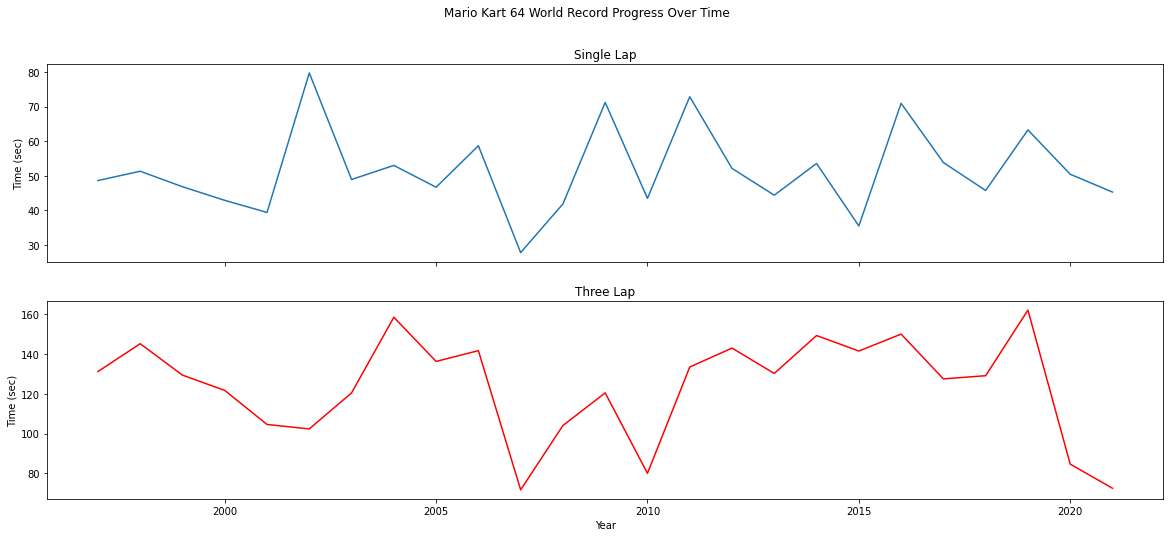

In [4]:
# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
# ax1.plot(x, y)
# ax2.plot(x, -y)

# set up fig containers
fig, (ax1, ax2) = plt.subplots(2,sharex=True)
fig.suptitle('Mario Kart 64 World Record Progress Over Time')
fig.set_figheight(8)
fig.set_figwidth(20)

# single lap progress
ax1.plot('year', 'mean', data = r1sl)
ax1.set_title('Single Lap')
ax1.set_ylabel('Time (sec)')

# three lap progress
ax2.plot('year', 'mean', 'red', data = r1tl)
ax2.set_title('Three Lap')
ax2.set_ylabel('Time (sec)')
ax2.set_xlabel('Year');

### Which track is the fastest?

In [5]:
r_stats = records.groupby(['track', 'type']).time.describe().reset_index()
r_stats_sl = r_stats[r_stats['type'] == 'Single Lap']
r_stats_sl_bar = r_stats_sl.sort_values(by = 'min')
r_stats_tl = r_stats[r_stats['type'] == 'Three Lap']
r_stats_tl_bar = r_stats_tl.sort_values(by = 'min')

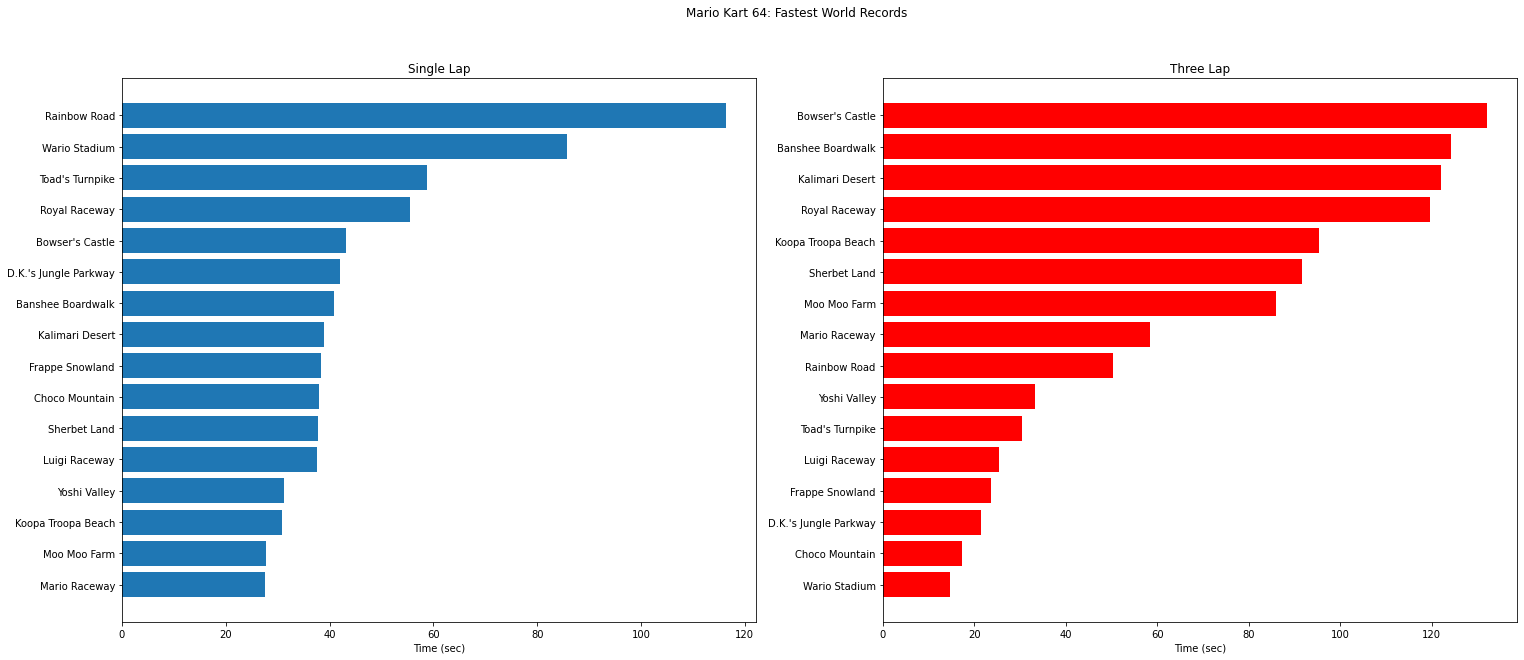

In [6]:
# set up subplots 
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(25)
fig.suptitle('Mario Kart 64: Fastest World Records')

# ax1 = Single Lap
ax1.barh(y = r_stats_sl_bar['track'], width = r_stats_sl_bar['min'])
ax1.set_title('Single Lap')
ax1.set_xlabel('Time (sec)')

# ax2 = Three Lap
ax2.barh(y = r_stats_tl_bar['track'], width = r_stats_tl_bar['min'], color = 'red')
ax2.set_title('Three Lap')
ax2.set_xlabel('Time (sec)');

In [7]:
# why do many courses have faster three lap times compared to single lap times?

### For which track did the world record improve the most?

In [8]:
# reshape data
## single lap
r_stats_sl['improvement'] = r_stats_sl['max'] - r_stats_sl['min']
r_stats_sl_imp = r_stats_sl.sort_values(by = 'improvement')

## three lap
r_stats_tl['improvement'] = r_stats_tl['max'] - r_stats_tl['min']
r_stats_tl_imp = r_stats_tl.sort_values(by = 'improvement')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



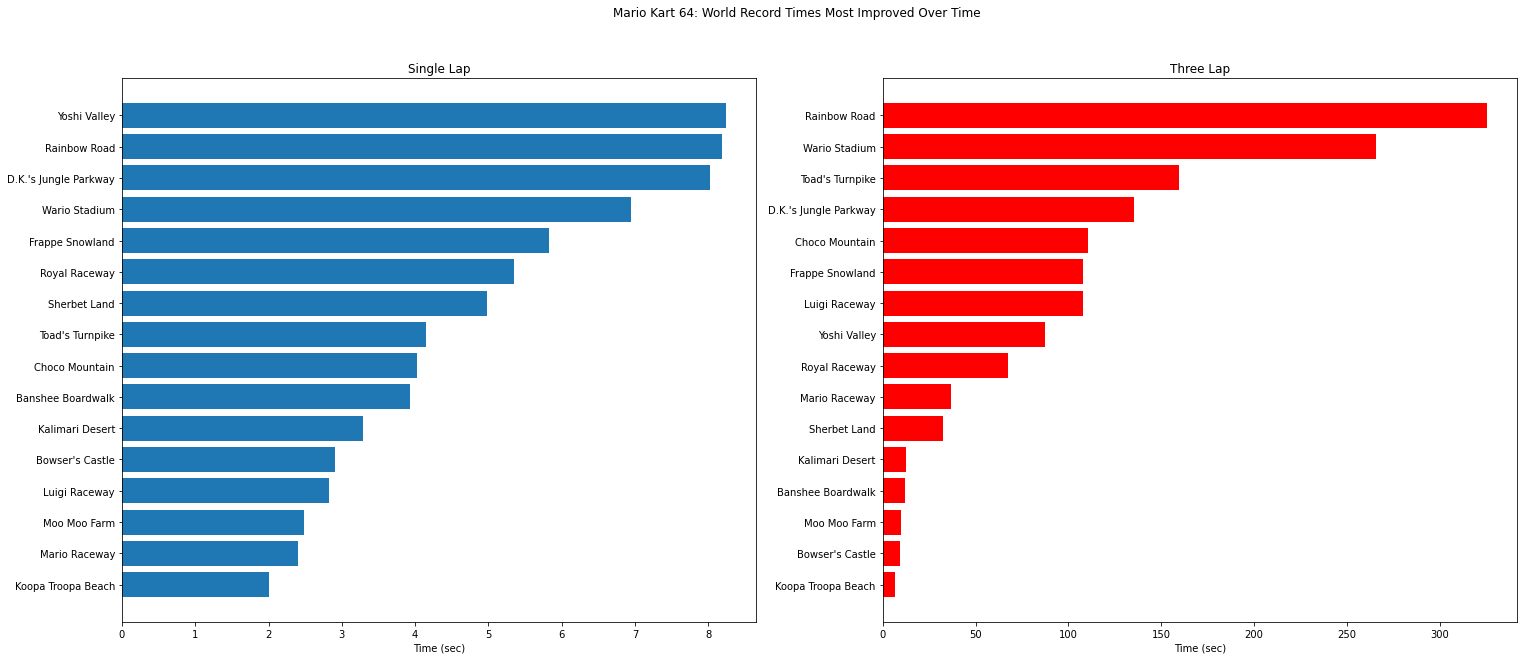

In [9]:
# set fig container
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(25)
fig.set_figheight(10)
fig.suptitle('Mario Kart 64: World Record Times Most Improved Over Time')

# ax1 = Single Lap
ax1.barh(y = r_stats_sl_imp['track'], width = r_stats_sl_imp['improvement'])
ax1.set_title('Single Lap')
ax1.set_xlabel('Time (sec)')

# ax2 = Three Lap
ax2.barh(y = r_stats_tl_imp['track'], width = r_stats_tl_imp['improvement'], color = 'red')
ax2.set_title('Three Lap')
ax2.set_xlabel('Time (sec)');

### For how many tracks have shortcuts been discovered?

In [10]:
tracks_by_shortcuts = records.groupby(['track', 'shortcut']).size().reset_index(name = 'count')
records['with_shortcut'] = np.where(records['shortcut'] == "Yes", 1, 0)
records.groupby('track').with_shortcut.max().reset_index(name = 'with_shortcut').groupby('with_shortcut').size()

with_shortcut
0     4
1    12
dtype: int64

There are 12 (out of 16 tracks) in Mario Kart 64 have where shortcuts have been discovered.

### When were shortcuts discovered?

In [11]:
records[records['shortcut'] == "Yes"].groupby('track').date.min().reset_index(name = 'Date Shortcut Discovered')

,track,Date Shortcut Discovered
0,Choco Mountain,1997-03-10
1,D.K.'s Jungle Parkway,1997-03-10
2,Frappe Snowland,1997-03-10
3,Kalimari Desert,1997-03-10
4,Luigi Raceway,1997-02-16
5,Mario Raceway,1997-03-10
6,Rainbow Road,1997-03-07
7,Royal Raceway,1997-03-10
8,Sherbet Land,1997-03-10
9,Toad's Turnpike,1997-03-10


### On which track does the shortcut save the most time?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



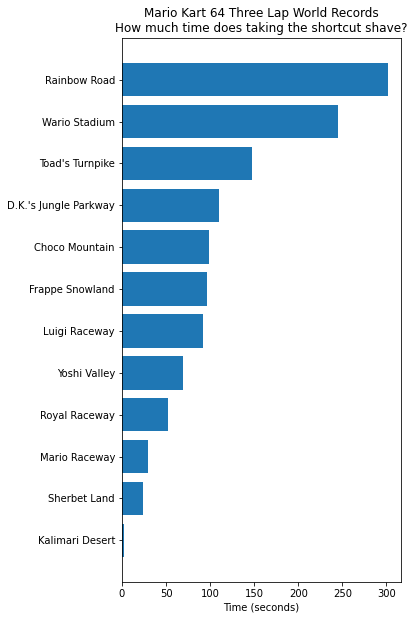

In [12]:
r_noshortcut = records[records['shortcut'] == "No"].groupby(['track', 'type']).time.min().reset_index(name = 'min_time_no_shortcut')
r_shortcut = records[records['shortcut'] == "Yes"].groupby(['track', 'type']).time.min().reset_index(name = 'min_time_shortcut')
r_shorts = r_noshortcut.merge(r_shortcut, how = 'left')
r_shorts2 = r_shorts[~r_shorts['min_time_shortcut'].isnull()]
r_shorts2['shortcut_shave'] = abs(r_shorts2['min_time_shortcut'] - r_shorts2['min_time_no_shortcut'])

# looks like the shortcuts only help for the three lap race!
r_shorts_tl = r_shorts2[r_shorts['type'] == "Three Lap"].sort_values(by = 'shortcut_shave')
plt.figure(figsize = (5,10))
plt.barh(y = r_shorts_tl['track'], width= r_shorts_tl['shortcut_shave'])
plt.title('Mario Kart 64 Three Lap World Records\nHow much time does taking the shortcut shave?')
plt.xlabel('Time (seconds)');

Some interesting aspects of the Mario Kart 64 World Records was learned by assessing how much time taking the shortcut adds! For example, none of the single lap records were affected by the presense or absense of a shortcut. This suggests that the 'shortcut' must refer to an exploit which can only be abused when the driver needs to cross the finish line more than once.  
  
When we look at shortcut shave for three lap world records, it looks like Rainbow road by a landslide! Watching the world record youtube video makes it pretty clear why this shortcut shaves so much time. The driver _immediately_ drives off the edge of the course, and is returned to _right before the lap line_ after they've fallen off the map. This lets them technically cross the lap line to initiate the next lap before iterating over that same method.  
https://www.youtube.com/watch?v=qNoV422V59g  
  
It would not be surprising if the other tracks where shortcut shaved off significant time are capable of abusing similar types of exploits.

### Which is the longest standing world record?

In [13]:
longest_records = records.groupby(['track', 'type', 'shortcut']).record_duration.max().reset_index(name = 'max_record_duration').sort_values(by = 'max_record_duration', ascending = False)
cols = ['track', 'type', 'shortcut', 'max_record_duration', 'player', 'date']
long_rec = longest_records.merge(records, how = 'left', left_on = ['track', 'type', 'shortcut', 'max_record_duration'], right_on = ['track', 'type', 'shortcut', 'record_duration'])[cols].head(10)

long_rec['record_id'] = long_rec['player'].astype(str) + " " + long_rec['date'].astype(str) + "  (Shorcut: " + long_rec['shortcut'].astype(str) + ")"
fig = px.bar(long_rec, orientation='h', y = 'record_id', x = 'max_record_duration',
             text = 'track', color = 'type',
             title = 'Mario Kart 64 Longest Standing World Records')
fig.update_layout(yaxis_categoryorder = 'total ascending')
fig

### Who is the player with the most world records?

In [14]:
drivers.groupby('player').total.max().reset_index(name = 'total_records').sort_values(by = 'total_records', ascending= False).reset_index().loc[0]

index               63
player           Penev
total_records      344
Name: 0, dtype: object

### Who are the recent players?

In [15]:
records.groupby('player').date.max().reset_index(name = 'max_date').sort_values(by = 'max_date', ascending = False).head(10)

,player,max_date
63,abney317,2021-02-25
32,MR,2021-02-20
64,iMathII,2021-02-14
59,Weatherton,2021-02-09
5,Dan,2021-02-04
58,VAJ,2021-01-21
51,Smurfy,2020-10-16
61,Zoran,2020-10-12
21,Jonesy,2020-08-11
24,Kyman,2020-08-09
